In [2]:
import folium
import requests
import csv
import pandas as pd

house_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.drop(columns = ["LandContour","Utilities","Street","Alley","LandSlope","MasVnrType","Condition2","Heating","Electrical","MasVnrArea","RoofMatl","BsmtFinSF2","BsmtCond","ExterCond","Foundation","GarageFinish","LowQualFinSF","Functional","YearBuilt","YearRemodAdd","ExterQual","MSSubClass","MSZoning","LotConfig","LotFrontage","LotArea","LotShape","MiscFeature","MiscVal","BldgType","HouseStyle","Neighborhood","Id","Condition1","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","BsmtQual","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","BsmtFullBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","GarageYrBlt","GarageCars","FullBath","HalfBath","GarageCond","Fence","SaleType","SaleCondition","PavedDrive","GarageArea","GarageQual","PoolArea","PoolQC"])
#Edit months sold to calendar words not numbers (new column)

,HeatingQC,CentralAir,Fireplaces,FireplaceQu,GarageType,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,Ex,Y,0,NaN,Attchd,0,61,0,0,0,2,2008,208500
1,Ex,Y,1,TA,Attchd,298,0,0,0,0,5,2007,181500
2,Ex,Y,1,TA,Attchd,0,42,0,0,0,9,2008,223500
3,Gd,Y,1,Gd,Detchd,0,35,272,0,0,2,2006,140000
4,Ex,Y,1,TA,Attchd,192,84,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Ex,Y,1,TA,Attchd,0,40,0,0,0,8,2007,175000
1456,TA,Y,2,TA,Attchd,349,0,0,0,0,2,2010,210000
1457,Ex,Y,2,Gd,Attchd,0,60,0,0,0,5,2010,266500
1458,Gd,Y,0,NaN,Attchd,366,0,112,0,0,4,2010,142125


Dropping irrelevant data

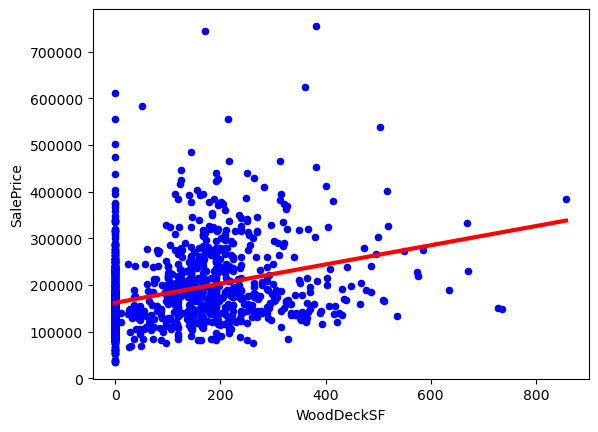

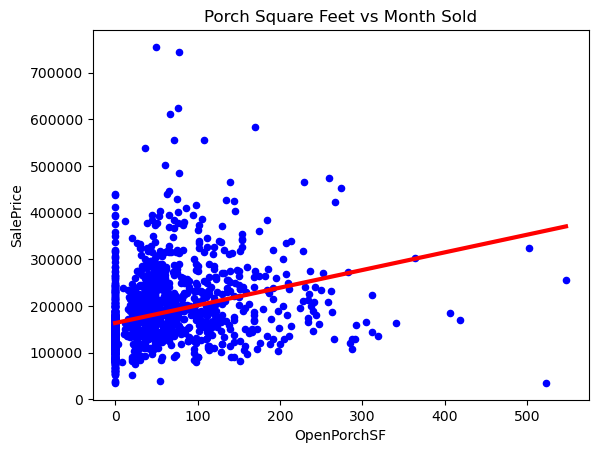

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X_wood = house_df['WoodDeckSF'].values.reshape(-1,1)
X_porch = house_df['OpenPorchSF'].values.reshape(-1,1)
Y = house_df['SalePrice'].values

reg = LinearRegression()
reg2 = LinearRegression()

prediction_wood = np.linspace(min(X_wood), max(X_wood)).reshape(-1, 1)
prediction_porch = np.linspace(min(X_porch), max(X_porch)).reshape(-1, 1)

reg.fit(X_wood, Y)
reg2.fit(X_porch, Y)

wood_pred = reg.predict(prediction_wood)
porch_pred = reg2.predict(prediction_porch)

house_df.plot.scatter('WoodDeckSF','SalePrice', c= 'b')
plt.plot(prediction_wood, wood_pred, color='red', linewidth=3)
house_df.plot.scatter('OpenPorchSF','SalePrice', c= 'b')
plt.plot(prediction_porch, porch_pred, color='red', linewidth=3)
plt.title("Porch Square Feet vs Month Sold")
plt.show()

<AxesSubplot:xlabel='MoSold', ylabel='3SsnPorch'>

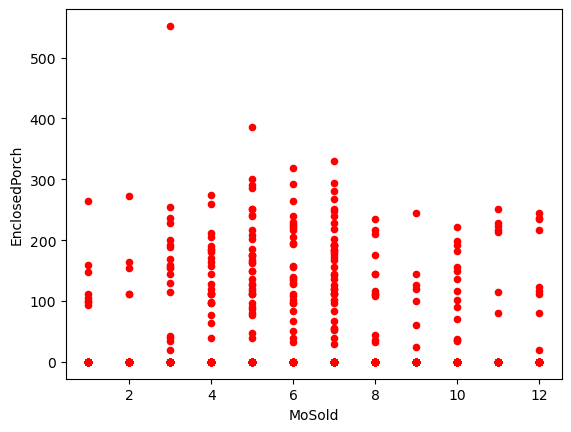

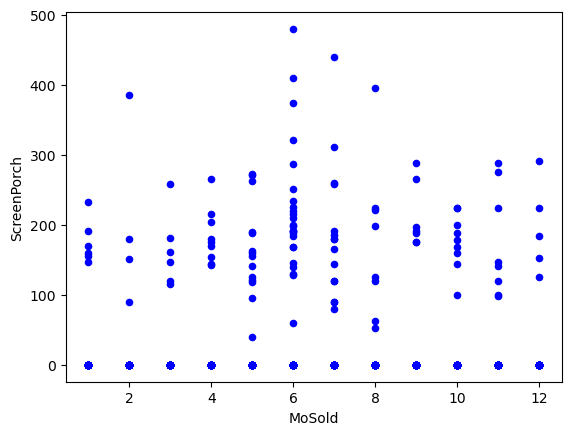

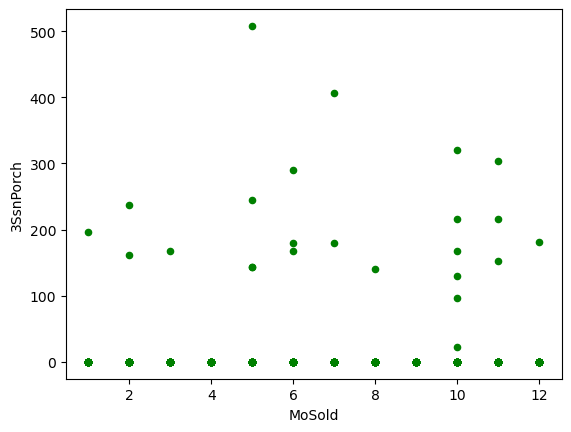

In [16]:
house_df.plot.scatter('MoSold','EnclosedPorch', c= 'r')
house_df.plot.scatter('MoSold','ScreenPorch', c= 'b')
house_df.plot.scatter('MoSold','3SsnPorch', c= 'g')

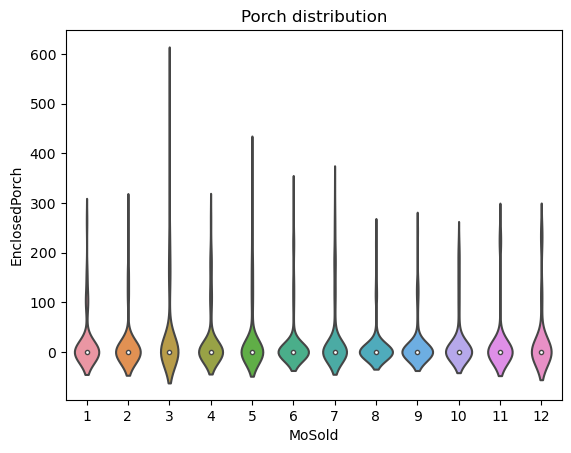

In [17]:
import seaborn

fig, ax = plt.subplots()

seaborn.violinplot(ax = ax,
               data = house_df,
               x = 'MoSold',
               y = 'EnclosedPorch',
               hue = None,
               split = True)
plt.title("Porch distribution")
plt.show()
#Need something different than violinplot

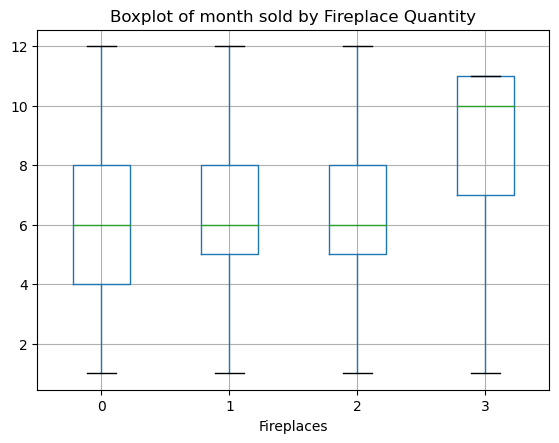

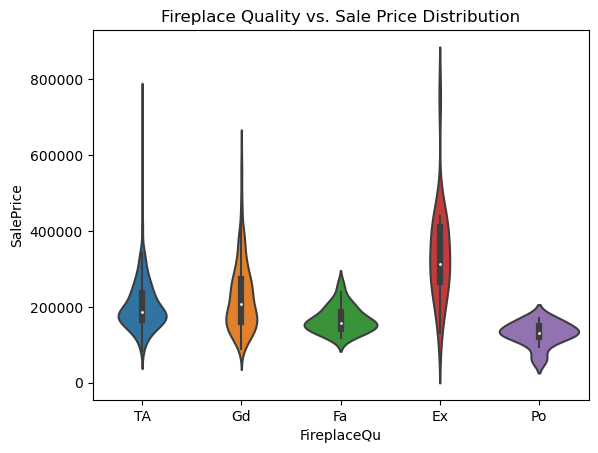

In [33]:
house_df.boxplot('MoSold','Fireplaces')
plt.title("Boxplot of month sold by Fireplace Quantity")
plt.suptitle('')
fig, ax = plt.subplots()
seaborn.violinplot(ax = ax,
               data = house_df,
               x = 'FireplaceQu',
               y = 'SalePrice',
               hue = None,
               split = True)
plt.title("Fireplace Quality vs. Sale Price Distribution")
#house_df.plot.scatter('FireplaceQu','SalePrice')

plt.show()

In [91]:
dec = house_df.loc[house_df['MoSold']==1]
print(dec.size)
print(house_df.size)
if 'Po' in dec['HeatingQC'].values: #if statement doesnt work
    c = dec['HeatingQC'].value_counts()['Po']
    #print(c)

4698
118260


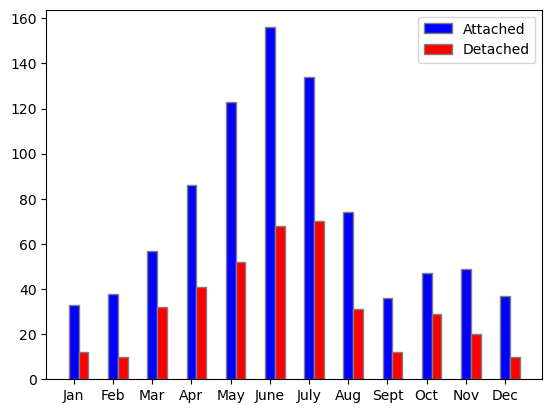

In [54]:
#house_df.plot.bar('GarageType','MoSold')
X = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
det = []
att = []
for i in range(1,13):
    month = house_df.loc[house_df['MoSold'] == i]
    month_att = month['GarageType'].value_counts()['Attchd']
    month_det = month['GarageType'].value_counts()['Detchd']
    att.append(month_att)
    det.append(month_det)

   
br1 = np.arange(len(X))
br2 = [X + 0.25 for X in br1]
plt.bar(X,att,color='blue', width = 0.25,
        edgecolor ='grey', label ='Attached')
plt.bar(br2,det, color='red', width = 0.25,
        edgecolor ='grey', label ='Detached')
plt.legend()
plt.show()

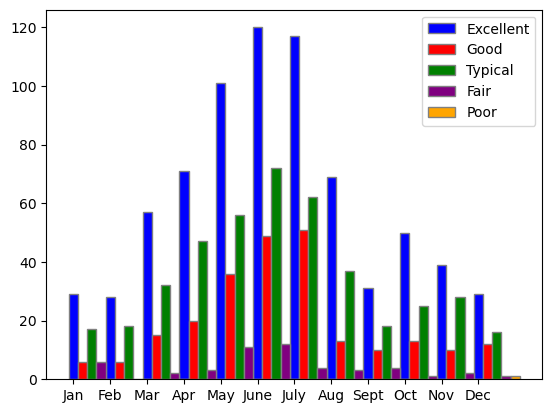

In [105]:
#house_df.bar('MoSold','HeatingQC')
barWidth = 0.25
ex = []
gd = []
ta = []
fa = []
po = []

for i in range(1,13):
    month = house_df.loc[house_df['MoSold'] == i]
    if 'Ex' in month.values:
        E = month['HeatingQC'].value_counts()['Ex']
        ex.append(E)
    else:
        ex.append(0)
        
    if 'Gd' in month['HeatingQC'].values:
        G = month['HeatingQC'].value_counts()['Gd']
        gd.append(G)
    else:
        gd.append(0)
        
    if 'Fa' in month['HeatingQC'].values:
        F = month['HeatingQC'].value_counts()['Fa']
        fa.append(F)
    else:
        fa.append(0)
        
    if 'TA' in month['HeatingQC'].values:
        T = month['HeatingQC'].value_counts()['TA']
        ta.append(T)
    else:
        ta.append(0)
        
    if 'Po' in month['HeatingQC'].values:
        P = month['HeatingQC'].value_counts()['Po']
        po.append(P)
    else:
        po.append(0)
   
    
    
    
    

br1 = np.arange(len(X))
br2 = [X + barWidth for X in br1]
br3 = [X + barWidth for X in br2]
br4 = [X + barWidth for X in br3]
br5 = [X + barWidth for X in br4]


plt.bar(X,ex,color='blue', width = barWidth,
        edgecolor ='grey', label ='Excellent')
plt.bar(br2,gd, color='red', width = barWidth,
        edgecolor ='grey', label ='Good')
plt.bar(br3,ta, color='green', width = barWidth,
        edgecolor ='grey', label ='Typical')
plt.bar(br4,fa, color='purple', width = barWidth,
        edgecolor ='grey', label ='Fair')
plt.bar(br5,po, color='orange', width = barWidth,
        edgecolor ='grey', label ='Poor')
plt.legend()
plt.show()

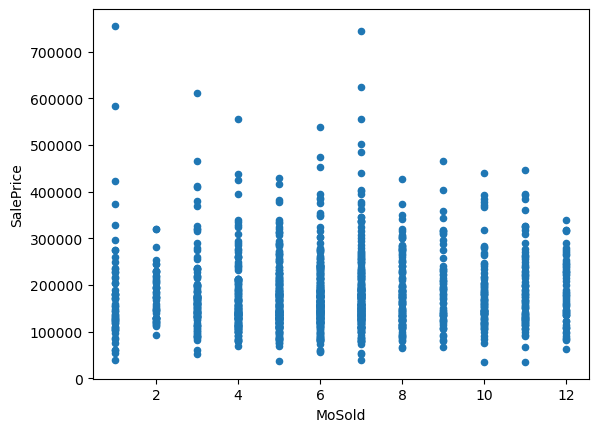

In [84]:
house_df.plot.scatter('MoSold','SalePrice')
plt.show()

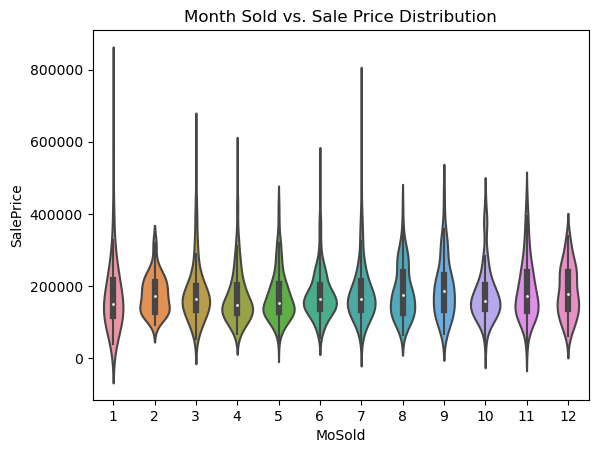

In [85]:
fig, ax = plt.subplots()
seaborn.violinplot(ax = ax,
               data = house_df,
               x = 'MoSold',
               y = 'SalePrice',
               hue = None,
               split = True)
plt.title("Month Sold vs. Sale Price Distribution")

plt.show()